# Import packages

In [33]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


# Define CLIENT info of foursquare API

In [34]:
CLIENT_ID = 'C4J035AMEDZE3JXWQPOKLGTZTMUGRECHXNAJ1VFWUNLTC4G4' # your Foursquare ID
CLIENT_SECRET = 'XKJC5AOLMNPIEKZW51SVXEZOTZ1X5CNRMVNCREKDUL4NUNGH' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C4J035AMEDZE3JXWQPOKLGTZTMUGRECHXNAJ1VFWUNLTC4G4
CLIENT_SECRET:XKJC5AOLMNPIEKZW51SVXEZOTZ1X5CNRMVNCREKDUL4NUNGH


# Search nearby restaurants of central Toronto

In [35]:
#Search neary restaurants
lat=43.652645 #Toronto
lng=-79.383508 #Toronto
radius=500
LIMIT=100
search_query = 'Restaurant'

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            search_query)
    
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ccc5e066a607121223470cd'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d14e941735',
      'name': 'American Restaurant',
      'pluralName': 'American Restaurants',
      'primary': True,
      'shortName': 'American'}],
    'hasPerk': False,
    'id': '4ad4c05ff964a52048f720e3',
    'location': {'address': '110 Chestnut Street',
     'cc': 'CA',
     'city': 'Toronto',
     'country': 'Canada',
     'distance': 316,
     'formattedAddress': ['110 Chestnut Street',
      'Toronto ON M5G 1R3',
      'Canada'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65488413420439,
       'lng': -79.38593077371578}],
     'lat': 43.65488413420439,
     'lng': -79.38593077371578,
     'postalCode': 'M5G 1R3',
     'state': 'ON'},
    'name': 'Hemispheres Restaurant & Bistro',
    'referralId': 'v-1556897286'},
   {'catego

# Normalizae response data

In [36]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'shortName': 'American', 'id': '4bf58dd8d489...",False,4ad4c05ff964a52048f720e3,110 Chestnut Street,CA,Toronto,Canada,NaN,316,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,Hemispheres Restaurant & Bistro,v-1556897286,NaN
1,"[{'shortName': 'Restaurant', 'id': '4bf58dd8d4...",False,4b295e10f964a520ba9d24e3,14 Queen St W,CA,Toronto,Canada,NaN,263,"[14 Queen St W, Toronto ON M5H 3X4, Canada]","[{'label': 'display', 'lat': 43.65261436174172...",43.652614,-79.380231,NaN,M5H 3X4,ON,Richtree Natural Market Restaurants,v-1556897286,NaN
2,"[{'shortName': 'Restaurant', 'id': '4bf58dd8d4...",False,50ca02c0245f2d4aa8c2b313,145 Richmond Street West,CA,Toronto,Canada,Hilton Toronto,338,"[145 Richmond Street West (Hilton Toronto), To...","[{'label': 'display', 'lat': 43.65000998764964...",43.650010,-79.385608,NaN,M5H 2L2,ON,Tundra Restaurant,v-1556897286,NaN
3,"[{'shortName': 'Chinese', 'id': '4bf58dd8d4898...",False,4b2027b5f964a520f82d24e3,195 Dundas St W,CA,Toronto,Canada,at University Ave,384,"[195 Dundas St W (at University Ave), Toronto ...","[{'label': 'display', 'lat': 43.65492521335936...",43.654925,-79.387089,NaN,M5G 1C7,ON,Hong Shing Chinese Restaurant,v-1556897286,60327598
4,"[{'shortName': 'Diner', 'id': '4bf58dd8d48988d...",False,4ad7929cf964a520500c21e3,249 Victoria Street,CA,Toronto,Canada,btwn Dundas St E and Shuter St,481,[249 Victoria Street (btwn Dundas St E and Shu...,"[{'label': 'display', 'lat': 43.65564091455335...",43.655641,-79.379199,NaN,M5B 1T8,ON,The Senator Restaurant,v-1556897286,55585058


In [37]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,CA,Toronto,Canada,NaN,316,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,4ad4c05ff964a52048f720e3
1,Richtree Natural Market Restaurants,Restaurant,14 Queen St W,CA,Toronto,Canada,NaN,263,"[14 Queen St W, Toronto ON M5H 3X4, Canada]","[{'label': 'display', 'lat': 43.65261436174172...",43.652614,-79.380231,NaN,M5H 3X4,ON,4b295e10f964a520ba9d24e3
2,Tundra Restaurant,Restaurant,145 Richmond Street West,CA,Toronto,Canada,Hilton Toronto,338,"[145 Richmond Street West (Hilton Toronto), To...","[{'label': 'display', 'lat': 43.65000998764964...",43.650010,-79.385608,NaN,M5H 2L2,ON,50ca02c0245f2d4aa8c2b313
3,Hong Shing Chinese Restaurant,Chinese Restaurant,195 Dundas St W,CA,Toronto,Canada,at University Ave,384,"[195 Dundas St W (at University Ave), Toronto ...","[{'label': 'display', 'lat': 43.65492521335936...",43.654925,-79.387089,NaN,M5G 1C7,ON,4b2027b5f964a520f82d24e3
4,The Senator Restaurant,Diner,249 Victoria Street,CA,Toronto,Canada,btwn Dundas St E and Shuter St,481,[249 Victoria Street (btwn Dundas St E and Shu...,"[{'label': 'display', 'lat': 43.65564091455335...",43.655641,-79.379199,NaN,M5B 1T8,ON,4ad7929cf964a520500c21e3
5,Hendricks Restaurant & Bar,Restaurant,Yonge And Queen,CA,Toronto,Canada,NaN,318,"[Yonge And Queen, Toronto ON M5G 2H6, Canada]","[{'label': 'display', 'lat': 43.65341542752959...",43.653415,-79.379698,NaN,M5G 2H6,ON,5a8b24b2018cbb6c4ca70dae
6,Maezo Restaurant & Bar,Indian Restaurant,67 Richmond Street West,CA,Toronto,Canada,Richmond and Bay Street,218,[67 Richmond Street West (Richmond and Bay Str...,"[{'label': 'display', 'lat': 43.65109052088520...",43.651091,-79.381843,NaN,M5H 1Z5,ON,5834c90e110d032f3217f899
7,Osgoode Hall Restaurant,New American Restaurant,130 Queen St W,CA,NaN,Canada,University Ave,144,"[130 Queen St W (University Ave), M5H 2N6, Can...","[{'label': 'display', 'lat': 43.65197895903515...",43.651979,-79.385049,NaN,M5H 2N6,NaN,4cffc78a75d3236a3b10e7f7
8,Kyoto House Japanese Restaurant,Sushi Restaurant,143 Dundas St. West,CA,Toronto,Canada,NaN,336,"[143 Dundas St. West, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65538110598594...",43.655381,-79.385270,NaN,NaN,ON,4ae4b055f964a520229d21e3
9,Little India Restaurant,Indian Restaurant,255 Queen St. W,CA,Toronto,Canada,Queen and University,512,"[255 Queen St. W (Queen and University), Toron...","[{'label': 'display', 'lat': 43.65031880877208...",43.650319,-79.388998,NaN,M5V 1Z4,ON,4ad8a5a7f964a5203c1321e3


In [38]:
dataframe_filtered=dataframe_filtered.set_index(['id'])

# Draw a map of nearby restaurants

In [39]:
latitude=43.652645
longitude=-79.383508
#Draw 
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around central toronto

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.1
    ).add_to(venues_map)

# display map
venues_map

# Now get distance,rating,price,likes,tips data for each restaurant

In [40]:

for x in range(len(dataframe_filtered.index)):
    venue_id=dataframe_filtered.index[x]
    print(venue_id)
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        dataframe_filtered.loc[venue_id,'Rating']=result['response']['venue']['rating']
        #print(result['response']['venue']['rating'])
    except:
        dataframe_filtered.loc[venue_id,'Rating']=0
        #print('This venue has not been rated yet.')
    try:
        dataframe_filtered.loc[venue_id,'Pricing']=result['response']['venue']['price']['tier']
        #print(result['response']['venue']['rating'])
    except:
        dataframe_filtered.loc[venue_id,'Pricing']=0    
    try:
        dataframe_filtered.loc[venue_id,'Likes']=result['response']['venue']['likes']['count']
        #print(result['response']['venue']['rating'])
    except:
        dataframe_filtered.loc[venue_id,'Likes']=0
    try:
        dataframe_filtered.loc[venue_id,'tips']=result['response']['venue']['tips']['count']
        #print(result['response']['venue']['rating'])
    except:
        dataframe_filtered.loc[venue_id,'tips']=0    
    
    #dataframe_filtered.loc[venue_id]['Rating']=result['response']['venue']['rating']
    #print(result['response']['venue']['price']['tier'])
    #print(result['response']['venue']['likes']['count'])
    #print(result['response']['venue']['tips']['count'])
dataframe_filtered

4ad4c05ff964a52048f720e3
4b295e10f964a520ba9d24e3
50ca02c0245f2d4aa8c2b313
4b2027b5f964a520f82d24e3
4ad7929cf964a520500c21e3
5a8b24b2018cbb6c4ca70dae
5834c90e110d032f3217f899
4cffc78a75d3236a3b10e7f7
4ae4b055f964a520229d21e3
4ad8a5a7f964a5203c1321e3
5a7c3e079de23b294a2c4117
52a7ae41498eed3af4d0a3fa
5c636fa1492814002c0cb117
4fbbb3ace4b01e39077b4d55
4afa1f33f964a520e91622e3
4ad4c061f964a520a7f720e3
5b7618541ffe97002c1a13ae
539c6f13498e06f4cc765165
53ae6660498e1ac3c1282743
4de827e4d4c0faa56428a51a
4c12b8ba82a3c9b6083ffaf8
4c476d6719fde21e32410876
4b2a674ef964a52074a824e3
4ad4c060f964a52070f720e3
56dd9d68498eb4e5edcb30f9
4ba2ab4af964a520650e38e3
4b82c671f964a52016e430e3
4edbccaaf9abeea3db5268df
4c69740b8d22c9284d42b745
4ae9ef82f964a520cbb721e3
4ad4c05df964a52026f620e3
5165c333e4b07a7ad88d8a69
4df909dfe4cd2129701c0690
5293ebf411d2f044f678efd8
4ed5094f0e01fd2f5bc0190f
4ada04eff964a520571d21e3
4afcc52df964a520b82522e3
4ae31ac7f964a520799021e3
4ad4c061f964a52095f720e3
4ba52d58f964a52015e838e3


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,Rating,Pricing,Likes,tips
id,,,,,,,,,,,,,,,,,,,
4ad4c05ff964a52048f720e3,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,CA,Toronto,Canada,NaN,316,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,6.3,1.0,9.0,5.0
4b295e10f964a520ba9d24e3,Richtree Natural Market Restaurants,Restaurant,14 Queen St W,CA,Toronto,Canada,NaN,263,"[14 Queen St W, Toronto ON M5H 3X4, Canada]","[{'label': 'display', 'lat': 43.65261436174172...",43.652614,-79.380231,NaN,M5H 3X4,ON,6.2,2.0,109.0,49.0
50ca02c0245f2d4aa8c2b313,Tundra Restaurant,Restaurant,145 Richmond Street West,CA,Toronto,Canada,Hilton Toronto,338,"[145 Richmond Street West (Hilton Toronto), To...","[{'label': 'display', 'lat': 43.65000998764964...",43.650010,-79.385608,NaN,M5H 2L2,ON,6.8,4.0,24.0,12.0
4b2027b5f964a520f82d24e3,Hong Shing Chinese Restaurant,Chinese Restaurant,195 Dundas St W,CA,Toronto,Canada,at University Ave,384,"[195 Dundas St W (at University Ave), Toronto ...","[{'label': 'display', 'lat': 43.65492521335936...",43.654925,-79.387089,NaN,M5G 1C7,ON,7.3,2.0,35.0,32.0
4ad7929cf964a520500c21e3,The Senator Restaurant,Diner,249 Victoria Street,CA,Toronto,Canada,btwn Dundas St E and Shuter St,481,[249 Victoria Street (btwn Dundas St E and Shu...,"[{'label': 'display', 'lat': 43.65564091455335...",43.655641,-79.379199,NaN,M5B 1T8,ON,8.2,2.0,183.0,96.0
5a8b24b2018cbb6c4ca70dae,Hendricks Restaurant & Bar,Restaurant,Yonge And Queen,CA,Toronto,Canada,NaN,318,"[Yonge And Queen, Toronto ON M5G 2H6, Canada]","[{'label': 'display', 'lat': 43.65341542752959...",43.653415,-79.379698,NaN,M5G 2H6,ON,6.3,2.0,10.0,5.0
5834c90e110d032f3217f899,Maezo Restaurant & Bar,Indian Restaurant,67 Richmond Street West,CA,Toronto,Canada,Richmond and Bay Street,218,[67 Richmond Street West (Richmond and Bay Str...,"[{'label': 'display', 'lat': 43.65109052088520...",43.651091,-79.381843,NaN,M5H 1Z5,ON,0.0,2.0,2.0,3.0
4cffc78a75d3236a3b10e7f7,Osgoode Hall Restaurant,New American Restaurant,130 Queen St W,CA,NaN,Canada,University Ave,144,"[130 Queen St W (University Ave), M5H 2N6, Can...","[{'label': 'display', 'lat': 43.65197895903515...",43.651979,-79.385049,NaN,M5H 2N6,NaN,0.0,3.0,2.0,4.0
4ae4b055f964a520229d21e3,Kyoto House Japanese Restaurant,Sushi Restaurant,143 Dundas St. West,CA,Toronto,Canada,NaN,336,"[143 Dundas St. West, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65538110598594...",43.655381,-79.385270,NaN,NaN,ON,5.8,2.0,72.0,55.0


In [41]:
dataframe_filtered[['name','categories','Rating','Pricing','Likes','tips']]

,name,categories,Rating,Pricing,Likes,tips
id,,,,,,
4ad4c05ff964a52048f720e3,Hemispheres Restaurant & Bistro,American Restaurant,6.3,1.0,9.0,5.0
4b295e10f964a520ba9d24e3,Richtree Natural Market Restaurants,Restaurant,6.2,2.0,109.0,49.0
50ca02c0245f2d4aa8c2b313,Tundra Restaurant,Restaurant,6.8,4.0,24.0,12.0
4b2027b5f964a520f82d24e3,Hong Shing Chinese Restaurant,Chinese Restaurant,7.3,2.0,35.0,32.0
4ad7929cf964a520500c21e3,The Senator Restaurant,Diner,8.2,2.0,183.0,96.0
5a8b24b2018cbb6c4ca70dae,Hendricks Restaurant & Bar,Restaurant,6.3,2.0,10.0,5.0
5834c90e110d032f3217f899,Maezo Restaurant & Bar,Indian Restaurant,0.0,2.0,2.0,3.0
4cffc78a75d3236a3b10e7f7,Osgoode Hall Restaurant,New American Restaurant,0.0,3.0,2.0,4.0
4ae4b055f964a520229d21e3,Kyoto House Japanese Restaurant,Sushi Restaurant,5.8,2.0,72.0,55.0


In [42]:
# Save to csv for repeatable use
dataframe_filtered.to_csv('dataframe_filtered.0502.csv')

# View the restaurants by rating of foursquares

In [43]:
#dataframe_filtered=dataframe_filtered[dataframe_filtered['Rating']>0]
dataframe_filtered=pd.read_csv('dataframe_filtered.0502.csv')
dataframe_filtered=dataframe_filtered.sort_values(by=['Rating'], ascending=False)
dataframe_filtered[['name','categories','lat','lng','distance','Rating','Pricing','Likes','tips']]

,name,categories,lat,lng,distance,Rating,Pricing,Likes,tips
41,Terroni,Italian Restaurant,43.650927,-79.375602,664,8.8,3.0,267.0,94.0
38,Salad King,Thai Restaurant,43.657601,-79.381620,572,8.6,2.0,490.0,209.0
17,The Elm Tree Restaurant,Modern European Restaurant,43.657397,-79.383761,529,8.3,0.0,23.0,12.0
4,The Senator Restaurant,Diner,43.655641,-79.379199,481,8.2,2.0,183.0,96.0
32,JOEY,American Restaurant,43.656094,-79.381878,405,8.1,2.0,348.0,179.0
9,Little India Restaurant,Indian Restaurant,43.650319,-79.388998,512,8.0,2.0,127.0,75.0
30,Reds Wine Tavern,Gastropub,43.649570,-79.382129,359,7.8,3.0,94.0,35.0
14,Fune Japanese Restaurant,Japanese Restaurant,43.648514,-79.386457,517,7.7,2.0,52.0,27.0
48,Portico,Restaurant,43.651856,-79.378055,447,7.6,3.0,15.0,6.0
45,Ali Baba's,Middle Eastern Restaurant,43.654916,-79.387172,388,7.5,1.0,18.0,3.0


# Visualization distance, price, rating of nearby hotels

Text(0.5,1,'Nearby Hotels')

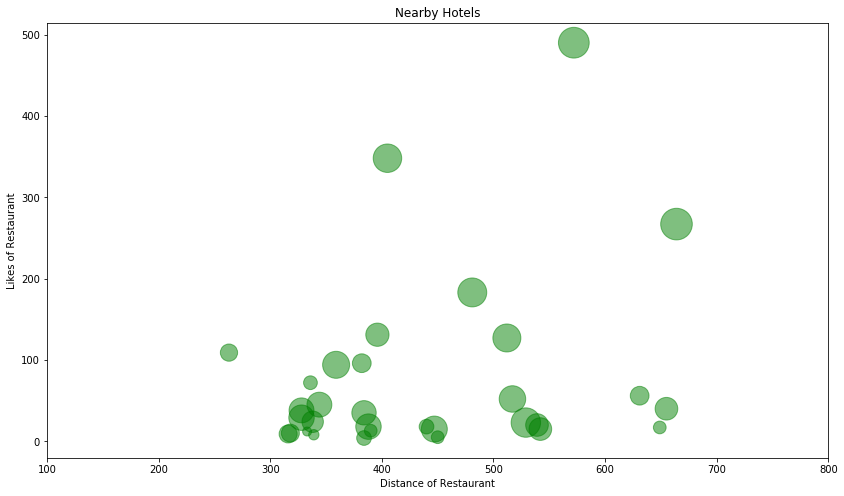

In [44]:
import matplotlib.pyplot as plt
graph_df=dataframe_filtered[dataframe_filtered['Rating']>0]
norm_rating = (graph_df['Rating'] - graph_df['Rating'].min()) / (graph_df['Rating'].max() - graph_df['Rating'].min())
ax0 = graph_df.plot(kind='scatter',
                    x='distance',
                    y='Likes',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_rating * 1000 ,  # pass in weights 
                    xlim=(100, 800)
                   )

ax0.set_ylabel('Likes of Restaurant')
ax0.set_xlabel('Distance of Restaurant')
ax0.set_title('Nearby Hotels')


# Visualization rating distribution

Text(0.5,1,'Number of Restaurants')

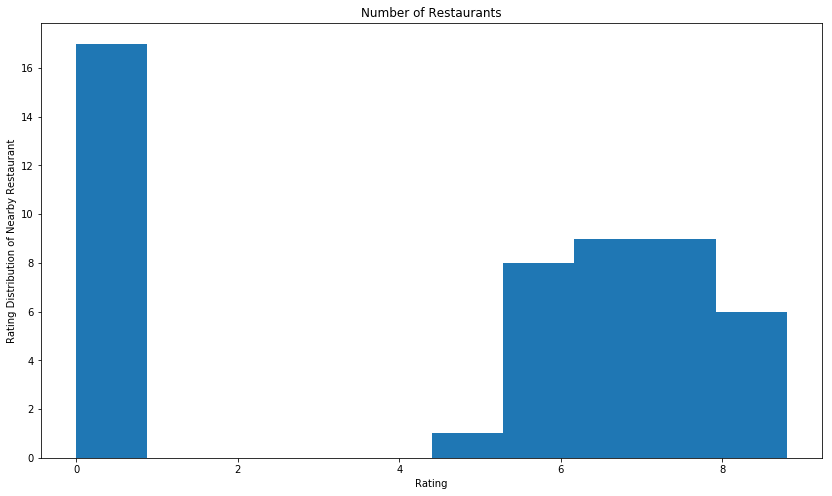

In [45]:
ax1 = dataframe_filtered['Rating'].plot(kind='hist',figsize=(14,8))

ax1.set_ylabel('Rating Distribution of Nearby Restaurant')
ax1.set_xlabel('Rating')
ax1.set_title('Number of Restaurants')

# Explore user data of a restaurant

In [46]:
#Get Users who like the venue
venue_id = '4df909dfe4cd2129701c0690' # ID of JOEY 
url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url
    
results = requests.get(url).json()
user_results = json_normalize(results['response']['likes']['items'])

In [47]:
user_results

,firstName,gender,id,lastName,photo.prefix,photo.suffix
0,MaBeatriz,female,515684604,Henriquez Guzman,https://fastly.4sqi.net/img/user/,/515684604_Asaxe-WJ_oGWaooY0VwNq0I31RjnDrCy2Zp...
1,Adeline,female,480391294,Garcia,https://fastly.4sqi.net/img/user/,/480391294_5LlD1iJx_YBKzDowE-_4-IlpLoqfZKuvG9i...
2,Pedro,male,60244990,Vaccara,https://fastly.4sqi.net/img/user/,/TZYRTJA4F05G0LTS.jpg


In [48]:
user_id = '515684604' # user ID with most agree counts and complete profile

url = 'https://api.foursquare.com/v2/users/{}?client_id={}&client_secret={}&v={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, VERSION) # define URL

# send GET request
results = requests.get(url).json()
user_data = results['response']['user']

# display features associated with user
user_data

{'bio': '',
 'canonicalUrl': 'https://foursquare.com/user/515684604',
 'checkins': {'count': 314, 'items': []},
 'contact': {},
 'firstName': 'MaBeatriz',
 'friends': {'count': 0,
  'groups': [{'count': 0,
    'items': [],
    'name': 'Other friends',
    'type': 'others'}]},
 'gender': 'female',
 'homeCity': 'Toronto, ON',
 'id': '515684604',
 'lastName': 'Henriquez Guzman',
 'lenses': [],
 'lists': {'count': 2,
  'groups': [{'count': 0, 'items': [], 'type': 'created'},
   {'count': 0, 'items': [], 'type': 'followed'},
   {'count': 2,
    'items': [{'canonicalUrl': 'https://foursquare.com/user/515684604/list/todos',
      'collaborative': False,
      'description': '',
      'editable': False,
      'id': '515684604/todos',
      'listItems': {'count': 1},
      'name': "MaBeatriz's Saved Places",
      'public': True,
      'type': 'todos',
      'url': '/user/515684604/list/todos'},
     {'canonicalUrl': 'https://foursquare.com/user/515684604/list/venuelikes',
      'collaborative'

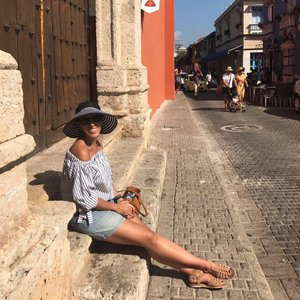

In [49]:
Image('https://fastly.4sqi.net/img/user/300x300/515684604_Asaxe-WJ_oGWaooY0VwNq0I31RjnDrCy2ZpV_9EOqEi3vZiF13DOj-DVGj8Nl45e-UqwsmFhI.jpg')

In [50]:
user_id = '515684604' # user ID with most agree counts and complete profile

url = 'https://api.foursquare.com/v2/users/{}/venuelikes?client_id={}&client_secret={}&v={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, VERSION) # define URL

# send GET request
results = requests.get(url).json()
results

{'meta': {'code': 403,
  'errorDetail': 'A user is required to call this endpoint.',
  'errorType': 'not_authorized',
  'requestId': '5ccc5e144434b9314ef6633d'},
 'response': {}}

# Now let's begin to recommend restaruants for Jack
# First we need to normalize data used to make recommendataion

In [51]:

dataframe_filtered['distance'] = 1-dataframe_filtered['distance']/dataframe_filtered['distance'].max()
dataframe_filtered['Rating'] = dataframe_filtered['Rating']/dataframe_filtered['Rating'].max()
dataframe_filtered['Pricing'] = 1-dataframe_filtered['Pricing']/dataframe_filtered['Pricing'].max()
dataframe_filtered['Likes'] = dataframe_filtered['Likes']/dataframe_filtered['Likes'].max()
dataframe_filtered['tips'] = dataframe_filtered['tips']/dataframe_filtered['tips'].max()
dataframe_filtered[['name','categories','lat','lng','distance','Rating','Pricing','Likes','tips']]

,name,categories,lat,lng,distance,Rating,Pricing,Likes,tips
41,Terroni,Italian Restaurant,43.650927,-79.375602,0.005988,1.000000,0.25,0.544898,0.449761
38,Salad King,Thai Restaurant,43.657601,-79.381620,0.143713,0.977273,0.50,1.000000,1.000000
17,The Elm Tree Restaurant,Modern European Restaurant,43.657397,-79.383761,0.208084,0.943182,1.00,0.046939,0.057416
4,The Senator Restaurant,Diner,43.655641,-79.379199,0.279940,0.931818,0.50,0.373469,0.459330
32,JOEY,American Restaurant,43.656094,-79.381878,0.393713,0.920455,0.50,0.710204,0.856459
9,Little India Restaurant,Indian Restaurant,43.650319,-79.388998,0.233533,0.909091,0.50,0.259184,0.358852
30,Reds Wine Tavern,Gastropub,43.649570,-79.382129,0.462575,0.886364,0.25,0.191837,0.167464
14,Fune Japanese Restaurant,Japanese Restaurant,43.648514,-79.386457,0.226048,0.875000,0.50,0.106122,0.129187
48,Portico,Restaurant,43.651856,-79.378055,0.330838,0.863636,0.25,0.030612,0.028708
45,Ali Baba's,Middle Eastern Restaurant,43.654916,-79.387172,0.419162,0.852273,0.75,0.036735,0.014354


# Now we get Jack's own rating for restaurant's he's been

In [52]:
userInput = [
            {'name':'Terroni', 'user_Rating':1},
            {'name':'Cali Restaurant', 'user_Rating':8}
         ] 
inputRestaurant = pd.DataFrame(userInput)
inputRestaurant

,name,user_Rating
0,Terroni,1
1,Cali Restaurant,8


# Get the restaurant's info of Jack's input list

In [53]:
inputId = dataframe_filtered[dataframe_filtered['name'].isin(inputRestaurant['name'].tolist())]
inputId
inputRestaurant = pd.merge(inputId, inputRestaurant)
inputRestaurant

,id,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,...,lat,lng,neighborhood,postalCode,state,Rating,Pricing,Likes,tips,user_Rating
0,4b49183ff964a520a46526e3,Terroni,Italian Restaurant,57 Adelaide St. E,CA,Toronto,Canada,at Church St.,0.005988,"['57 Adelaide St. E (at Church St.)', 'Toronto...",...,43.650927,-79.375602,St. Lawrence,M5C 1K6,ON,1.0,0.25,0.544898,0.449761,1
1,4c476d6719fde21e32410876,Cali Restaurant,Vietnamese Restaurant,179 Dundas St. W.,CA,Toronto,Canada,at Chestnut,0.468563,"['179 Dundas St. W. (at Chestnut)', 'Toronto O...",...,43.655068,-79.386375,NaN,M5G,ON,0.0,0.50,0.000000,0.000000,8


# Filtering out the restaurants from the input

In [54]:

userRestaurant = dataframe_filtered[dataframe_filtered['id'].isin(inputRestaurant['id'].tolist())]
userRestaurant

,id,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,Rating,Pricing,Likes,tips
41,4b49183ff964a520a46526e3,Terroni,Italian Restaurant,57 Adelaide St. E,CA,Toronto,Canada,at Church St.,0.005988,"['57 Adelaide St. E (at Church St.)', 'Toronto...","[{'label': 'display', 'lat': 43.650927, 'lng':...",43.650927,-79.375602,St. Lawrence,M5C 1K6,ON,1.0,0.25,0.544898,0.449761
21,4c476d6719fde21e32410876,Cali Restaurant,Vietnamese Restaurant,179 Dundas St. W.,CA,Toronto,Canada,at Chestnut,0.468563,"['179 Dundas St. W. (at Chestnut)', 'Toronto O...","[{'label': 'display', 'lat': 43.65506808, 'lng...",43.655068,-79.386375,NaN,M5G,ON,0.0,0.50,0.000000,0.000000


# Get the quantitive features of user restaurants

In [55]:
#Resetting the index to avoid future issues
userRestaurant = userRestaurant.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userRestaurantTable = userRestaurant[['distance','Rating','Pricing','Likes','tips']]

userRestaurantTable

,distance,Rating,Pricing,Likes,tips
0,0.005988,1.0,0.25,0.544898,0.449761
1,0.468563,0.0,0.50,0.000000,0.000000


In [56]:
inputRestaurant['user_Rating']

0    1
1    8
Name: user_Rating, dtype: int64

In [57]:
userRestaurantTable.transpose()

,0,1
distance,0.005988,0.468563
Rating,1.000000,0.000000
Pricing,0.250000,0.500000
Likes,0.544898,0.000000
tips,0.449761,0.000000


# Compute Jack's weights based on his input ,you can see Jack put more weights on distance and price

In [58]:
#userGenreTable.transpose()
#Dot produt to get weights
userProfile = userRestaurantTable.transpose().dot(inputRestaurant['user_Rating'])
#The user profile
userProfile

distance    3.754491
Rating      1.000000
Pricing     4.250000
Likes       0.544898
tips        0.449761
dtype: float64

# Now let's get the features of every restaurant in our original dataframe

In [59]:

restaurantTable = dataframe_filtered.set_index(dataframe_filtered['id'])
#And drop the unnecessary information
restaurantTable = restaurantTable[['distance','Rating','Pricing','Likes','tips']]
restaurantTable.head()

,distance,Rating,Pricing,Likes,tips
id,,,,,
4b49183ff964a520a46526e3,0.005988,1.000000,0.25,0.544898,0.449761
4ad4c061f964a52095f720e3,0.143713,0.977273,0.50,1.000000,1.000000
539c6f13498e06f4cc765165,0.208084,0.943182,1.00,0.046939,0.057416
4ad7929cf964a520500c21e3,0.279940,0.931818,0.50,0.373469,0.459330
4df909dfe4cd2129701c0690,0.393713,0.920455,0.50,0.710204,0.856459


In [60]:
restaurantTable.shape

(50, 5)

# Multiply the features by the weights and then take the weighted average

In [61]:

recommendationTable_df = ((restaurantTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

id
4b49183ff964a520a46526e3    0.258440
4ad4c061f964a52095f720e3    0.463689
539c6f13498e06f4cc765165    0.602634
4ad7929cf964a520500c21e3    0.451833
4df909dfe4cd2129701c0690    0.529629
dtype: float64

# Sort our recommendations in descending order


In [70]:
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

id
539c6f13498e06f4cc765165    0.602634
52a7ae41498eed3af4d0a3fa    0.600502
4ad4c05ff964a52048f720e3    0.590309
56dd9d68498eb4e5edcb30f9    0.584110
4ddd83c788779c82beb061fc    0.564046
dtype: float64

# Final recommendation. You can see the recommendation order is different from foursquare's rating order, that's because Jack has his own weights (price and distance) .

In [101]:
#The final recommendation table
recommendationTable_df2=recommendationTable_df.to_frame()
recommendationTable_df2.columns=['user_rating_score']
recommendationTable_df2
recommendationTable_df3=dataframe_filtered
recommendationTable_df3 = recommendationTable_df3.set_index('id')
recommendationTable_df3['user_rating_score']=recommendationTable_df2['user_rating_score']
recommendationTable_df3.sort_values(by='user_rating_score',ascending=False)
recommendationTable_df3[['user_rating_score','name','categories','lat','lng','distance','Rating','Pricing','Likes','tips']].sort_values(by='user_rating_score',ascending=False).head(5)

,user_rating_score,name,categories,lat,lng,distance,Rating,Pricing,Likes,tips
id,,,,,,,,,,
539c6f13498e06f4cc765165,0.602634,The Elm Tree Restaurant,Modern European Restaurant,43.657397,-79.383761,0.208084,0.943182,1.00,0.046939,0.057416
52a7ae41498eed3af4d0a3fa,0.600502,Yueh Tung Chinese Restaurant,Chinese Restaurant,43.655281,-79.385337,0.508982,0.852273,0.75,0.059184,0.047847
4ad4c05ff964a52048f720e3,0.590309,Hemispheres Restaurant & Bistro,American Restaurant,43.654884,-79.385931,0.526946,0.715909,0.75,0.018367,0.023923
56dd9d68498eb4e5edcb30f9,0.584110,Spring Rolls | Japanese Restaurant in Toronto,Theme Restaurant,43.656105,-79.383495,0.423653,0.000000,1.00,0.000000,0.000000
4ddd83c788779c82beb061fc,0.564046,Ali Baba's,Middle Eastern Restaurant,43.654916,-79.387172,0.419162,0.852273,0.75,0.036735,0.014354
